# Objectives through Brain Hack School #



### Quick reminder about myself ###


Starting my Master in Fall 2019, I came to BrainHack to familiarize myself with the tools I was going to use during my Master. Having no actual background or course in programming (only R), doing this course was a great opportunity to get started on Pythons and the various open softwares tools that are accessible.

The only thing I did prior to Brain Hack was converting my dataset in BIDS, which I had to do for me to sue fmriprep.

### Goals 
- Learn how to use **fmriprep** for a reproducible pre-processing fmri pipeline

- Learn more on the various steps in functional connectivity:
    e.g. How to use Brain Parcellations or Networks from an Author's atlas
    
    e.g. Extract from my own data a network components using ICA
    
    e.g. How to extract Seeds using sphere around a coordinates of interest.
    
    e.g. Doing actual functional connectivity to correlate regions across a time-series (Seeds, Parcellations or Networks


- Learn how to use **Python**, to get access to the various free neuroimaging tools 


- Learn how to use **Jupyter Notebook**, to get explain and show vizulization


- And ideally learn how to do all this on Beluga [Compute Canada], remotely.
    i.e. My main project will be on the UK Biobank (including thousands of participants). Because of the size of the files, it not possible yet to load them on my own computer)




- **Bonus**: An additional goal of mine was to present what I've learned in a lab meeting. Mostly on explaining how to use Compute Canada, running jobs, using fmriprep and BIDS, and ideal some *basic* pythons scripts


In [1]:
# Remove the warnings to keep notebook cleaner
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

   ## Loading the Nifti images ##

For 3-level nested for-loop was done to account for the nesting of multiples runs, in multiples sessions, for multiples subjects. 

In [3]:
#Defining Data Directory
data_dir = '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/'
#Task label & Space name
task_label = 'rest'
space_name = 'MNI152NLin6Asym'
#List of subjects
list_subjects = ['sub-001',
'sub-003',
'sub-005']
#List of sessions
list_sessions = ['ses-2']
#List of runs
list_runs = ['run-1']
N=len(list_subjects)
#Models for Nifti image
models_run_imgs=[]
for sub in list_subjects:
    for ses in list_sessions:
        for run in list_runs:
            run_img = [data_dir + sub + '/' + ses + '/func/' + sub + '_' + ses + '_task-' + task_label + '_' + run + '_space-' + space_name + '_desc-preproc_bold.nii.gz']
            models_run_imgs.append(run_img)

#Models for confound files
models_run_confs=[]
for sub in list_subjects:
    for ses in list_sessions:
        for run in list_runs:
            run_confs = [data_dir + sub + '/' + ses + '/func/' + sub + '_' + ses + '_task-' + task_label + '_' + run + '_desc-confounds_regressors.tsv']
            models_run_confs.append(run_confs)


In [4]:
models_run_imgs

[['/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-001/ses-2/func/sub-001_ses-2_task-rest_run-1_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz'],
 ['/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-003/ses-2/func/sub-003_ses-2_task-rest_run-1_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz'],
 ['/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-005/ses-2/func/sub-005_ses-2_task-rest_run-1_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz']]

In [5]:
models_run_confs

[['/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-001/ses-2/func/sub-001_ses-2_task-rest_run-1_desc-confounds_regressors.tsv'],
 ['/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-003/ses-2/func/sub-003_ses-2_task-rest_run-1_desc-confounds_regressors.tsv'],
 ['/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-005/ses-2/func/sub-005_ses-2_task-rest_run-1_desc-confounds_regressors.tsv']]

In [6]:
# the glob function will allow to link each Nifti and .tsv file of interest with their respective path directories.
from glob import glob
import os
DataDir = '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-*/ses-2/func/'
print(DataDir)
# Bold Nifti File of interest
Data = sorted(glob(os.path.join(DataDir, '*_ses-2_task-rest_run-1_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz')))
# Confound .tsv file of interest
Confounds = sorted(glob(os.path.join(DataDir, '*regressors.csv')))
print(Confounds)
print(Data)
len(Data)


/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-*/ses-2/func/
['/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-001/ses-2/func/sub-001_ses-2_task-rest_run-1_desc-confounds_regressors.csv', '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-003/ses-2/func/sub-003_ses-2_task-rest_run-1_desc-confounds_regressors.csv', '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-005/ses-2/func/sub-005_ses-2_task-rest_run-1_desc-confounds_regressors.csv', '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-006/ses-2/func/sub-006_ses-2_task-rest_run-1_desc-confounds_regressors.csv', '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-007/ses-2/func/sub-007_ses-2_task-rest_run-1_desc-confounds_regressors.csv', '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub

16

   ## Importing Nilearn ##

Nilearn is the main package that will be used for functional connectivity, for his various tools in both machine learning and neuroimaging.
For more information, see: https://nilearn.github.io/



In [7]:
import nilearn

/lustre03/project/6037352/tangsab8/CLBP_Network_Project/ENV/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


   ## Atlas fetching ##
   
Lets fetch the necessary atlas for brain parcellations. These will allows to cluster the voxels we're observing as coherent ROIs. Here, two different parcellations will be used for validity purposes.


   #### Network Parcellations #1: Yeo, 2011. 7-Networks. ####
   
   

   #### Brain Parcellations #1: Schaefer & Yeo, 2018. 400-Parcellations. ####
   For more information, see: https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_schaefer_2018.html
   
![Schaefer&Yeo,2018](https://pbs.twimg.com/media/Dz2u7WCU8AIxNJ4.jpg)

*Note: For now, I did not managed to cluster schaefer's parcellations to get the original 7-Network clusters from Yeo. Their GitHub indicate that they have a code in MatLab, but not in python for now*
See: https://github.com/ThomasYeoLab/CBIG/tree/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal

**Fetching Schaefer parcellations**

In [8]:
from nilearn import datasets
work_dir = '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/'
schaefer_parcellations = datasets.fetch_atlas_schaefer_2018(n_rois = 400, yeo_networks = 7, data_dir = work_dir)
labels_schaefer = schaefer_parcellations.labels 
atlas_schaefer = schaefer_parcellations.maps
print('Schaefer Atlas ROIs are located in nifti image (4D) at: %s' %
       atlas_schaefer)

Schaefer Atlas ROIs are located in nifti image (4D) at: /lustre03/project/6037352/tangsab8/CLBP_Network_Project/schaefer_2018/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


In [9]:
atlas_schaefer

'/lustre03/project/6037352/tangsab8/CLBP_Network_Project/schaefer_2018/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii.gz'

**Plotting Schaefer parcellations**

In [10]:
# Schaefer Parcellations Plotting
%matplotlib inline
from nilearn import plotting
import matplotlib.pyplot as plt
plotting.plot_roi(atlas_schaefer, draw_cross = False)
plt.show()

   ## Running various analyses on a single subjects ##

**Select a single subject**

In [11]:
fmri_filenames = Data[0]
print(fmri_filenames)

/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-001/ses-2/func/sub-001_ses-2_task-rest_run-1_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz


**Observe the mean of the fMRI image**

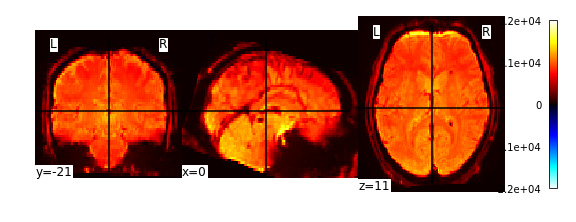

In [12]:
%matplotlib inline
from nilearn import image 
from nilearn import plotting
import matplotlib.pyplot as plt

averaged_Img = image.mean_img(fmri_filenames)
plotting.plot_stat_map(averaged_Img)
plt.show()


**Select the confounds**

In [13]:
import pandas as pd
Confounds_Example = pd.read_csv(Confounds[0])
Confounds_Example.head()

,csf,csf_derivative1,csf_derivative1_power2,csf_power2,white_matter,white_matter_derivative1,white_matter_power2,white_matter_derivative1_power2,global_signal,global_signal_derivative1,...,rot_z,rot_z_derivative1,rot_z_derivative1_power2,rot_z_power2,motion_outlier00,motion_outlier01,motion_outlier02,motion_outlier03,motion_outlier04,motion_outlier05
0,11489.919598,NaN,NaN,1.320183e+08,10409.204579,NaN,1.083515e+08,NaN,9963.804165,NaN,...,-0.001624,NaN,NaN,0.000003,0.0,0.0,0.0,0.0,0.0,0.0
1,11324.248872,-165.670726,27446.789596,1.282386e+08,10406.050563,-3.154016,1.082859e+08,9.947818,9949.387557,-14.416608,...,-0.001752,-0.000128,1.639424e-08,0.000003,0.0,0.0,0.0,0.0,0.0,0.0
2,11291.171628,-33.077243,1094.104016,1.274906e+08,10413.387403,7.336841,1.084386e+08,53.829232,9919.024722,-30.362836,...,-0.001643,0.000109,1.186574e-08,0.000003,0.0,0.0,0.0,0.0,0.0,0.0
3,11293.532141,2.360512,5.572019,1.275439e+08,10410.339648,-3.047756,1.083752e+08,9.288815,9913.310582,-5.714139,...,-0.001446,0.000197,3.878536e-08,0.000002,0.0,0.0,0.0,0.0,0.0,0.0
4,11237.903967,-55.628174,3094.493760,1.262905e+08,10399.760565,-10.579082,1.081550e+08,111.916980,9888.105188,-25.205394,...,-0.001446,0.000000,0.000000e+00,0.000002,0.0,0.0,0.0,0.0,0.0,0.0


**Select our basic confounds of interest**

In [14]:
Conf_Select = Confounds_Example[['csf', 'white_matter', 'global_signal', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']]
Conf_Select.head()

,csf,white_matter,global_signal,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z
0,11489.919598,10409.204579,9963.804165,-0.039287,-0.035364,-0.027836,-0.000533,0.000421,-0.001624
1,11324.248872,10406.050563,9949.387557,-0.032265,-0.023398,0.017787,-0.001658,0.000119,-0.001752
2,11291.171628,10413.387403,9919.024722,-0.033780,-0.038497,-0.009107,-0.000965,0.000370,-0.001643
3,11293.532141,10410.339648,9913.310582,-0.036643,-0.032446,0.015591,0.000089,0.000640,-0.001446
4,11237.903967,10399.760565,9888.105188,-0.036261,-0.014613,0.030963,0.000089,0.000257,-0.001446


**Select our correlation measures for the connectivity**

In [15]:
from nilearn.connectome import ConnectivityMeasure
C_measure = ConnectivityMeasure(kind = 'correlation')
PC_measure = ConnectivityMeasure(kind = 'partial correlation')

**Create a Nifti Mask to label our atlas**.

For more information, see: https://nilearn.github.io/auto_examples/03_connectivity/plot_signal_extraction.html

In [16]:
from nilearn.input_data import NiftiLabelsMasker
sch_masker = NiftiLabelsMasker(labels_img = atlas_schaefer, standardize = True, memory = 'nilearn_cache', verbose = 1)
print(sch_masker)

NiftiLabelsMasker(background_label=0, detrend=False, dtype=None, high_pass=None,
                  labels_img='/lustre03/project/6037352/tangsab8/CLBP_Network_Project/schaefer_2018/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii.gz',
                  low_pass=None, mask_img=None, memory='nilearn_cache',
                  memory_level=1, resampling_target='data', smoothing_fwhm=None,
                  standardize=True, t_r=None, verbose=1)


**Create a time-series for our matrices based on the mask we used**

In [17]:
time_series_Sch = sch_masker.fit_transform(fmri_filenames, confounds = Confounds[0])

[NiftiLabelsMasker.fit_transform] loading data from /lustre03/project/6037352/tangsab8/CLBP_Network_Project/schaefer_2018/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/lustre03/project/6037352/tangsab8/CLBP_Network_Project/FMRIPREP_OUTPUT/fmriprep/sub-001/ses-2/func/sub-001_ses-2_task-rest_run-1_space-MNI152NLin6Asym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/lustre03/project/6037352/tangsab8/CLBP_Network_Project/schaefer_2018/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds='/lustre03/project/6037352/tangsab8/CLBP_Network_Pr

ValueError: array must not contain infs or NaNs

In [18]:
time_series_Sch = sch_masker.fit_transform(fmri_filenames)

[NiftiLabelsMasker.fit_transform] loading data from /lustre03/project/6037352/tangsab8/CLBP_Network_Project/schaefer_2018/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


**Select our first participant dataset**

In [19]:
time_series_Sch.shape

(750, 400)

**Compute the matrices for the correlations**

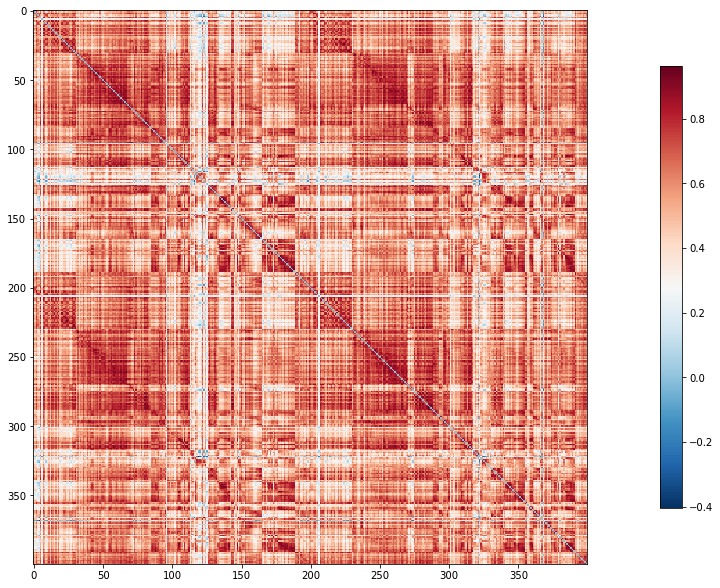

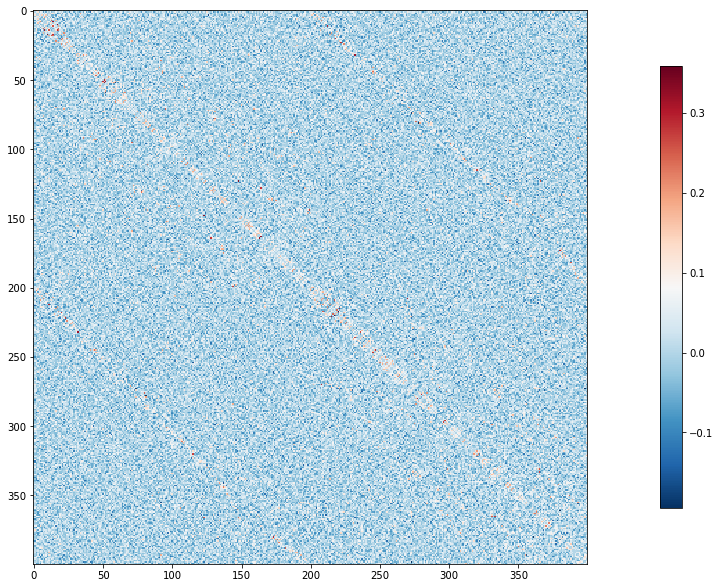

In [20]:
%matplotlib inline
from nilearn.connectome import ConnectivityMeasure
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt

C_matrix_Sch = C_measure.fit_transform([time_series_Sch])[0]
np.fill_diagonal(C_matrix_Sch, 0)
plotting.plot_matrix(C_matrix_Sch, figure=(10, 8))
plt.show()

PC_matrix_Sch = PC_measure.fit_transform([time_series_Sch])[0]
np.fill_diagonal(PC_matrix_Sch, 0)
plotting.plot_matrix(PC_matrix_Sch, figure=(10, 8))
plt.show()

**Show connectivity matrices**

**Means of Connectivity**
For more information, see: https://nilearn.github.io/auto_examples/03_connectivity/plot_atlas_comparison.html
        and https://nilearn.github.io/modules/generated/nilearn.connectome.ConnectivityMeasure.html

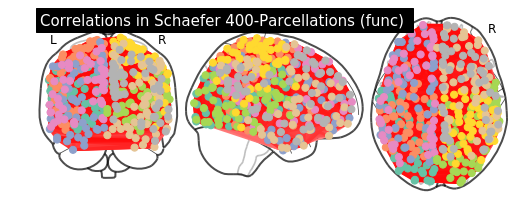

In [ ]:
%matplotlib inline
from nilearn import plotting  
import matplotlib.pyplot as plt
mean_C_matrix = C_measure.mean_
C_coordinates = plotting.find_parcellation_cut_coords(labels_img = atlas_schaefer)
plotting.plot_connectome(mean_C_matrix, C_coordinates,
                         edge_threshold = "20%",
                         title = 'Correlations in Schaefer 400-Parcellations (func) ')
plt.show()

In [ ]:
mean_PC_matrix = PC_measure.mean_
PC_coordinates = plotting.find_parcellation_cut_coords(labels_img = atlas_schaefer)
plotting.plot_connectome(mean_PC_matrix, PC_coordinates,
                         edge_threshold = "20%",
                         title = 'Partial Correlations in Schaefer 400-Parcellations (func) ')
plt.show()

**Seed-Based Correlation Analysis**

The Seeds are refered in Baliki et al. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3411898/ and in Hubbard et al. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4399775/


In [ ]:
# Seed of Interest
# Baliki et al.
R_NAc_Coords = [(10, 12, -8)]
R_mPFC_Coords = [(2, 52, -2)]
R_INS_Coords = [(40, -6, -2)]
L_S1_M1_Coords = [(-32, -34, 66)]
Baliki_seeds = [(10, 12, -8), (2, 52, -2), (40, -6, -2), (-32, -34, 66)]
# Hubbard et al.
L_PCC_Coords = [(-8, -46, 27)]
L_aINS_Coords = [(-36, 14, -23)]
Hubbard_seeds = [(-8, -46, 27), (-36, 14, -23)]

In [ ]:
%matplotlib inline
from nilearn import plotting  
import matplotlib.pyplot as plt
view = plotting.view_markers( 
    Baliki_seeds, ['red', 'cyan', 'magenta', 'orange', 'blue'], marker_size=10) 
    view.open_in_browser()
view = plotting.view_markers( 
    Hubbard_seeds, ['red', 'cyan', 'magenta'], marker_size=10) 
    view.open_in_browser()

**Extract a Time-Series from Seed**
For information, see: https://nilearn.github.io/modules/generated/nilearn.input_data.NiftiSpheresMasker.html and https://nilearn.github.io/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html 

In [ ]:
from nilearn import input_data

R_NAc_Seed_Masker = input_data.NiftiSpheresMasker(
    R_NAc_Coords, radius=10,
    detrend=FALSE, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.,
    memory='nilearn_cache', memory_level=1, verbose=0)

R_NAc_Seed_Time_Series = seed_masker.fit_transform(fmriprep_005_2_1, confounds=[cf005_2_1])

print("Seed time series shape: (%s, %s)" % R_NAc_Seed_Time_Series)

**Extracting ICA from resting-state**
See: https://nilearn.github.io/connectivity/resting_state_networks.html

In [ ]:
from nilearn.decomposition import CanICA

CanICA = CanICA(n_components=7, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
canica.fit(func_filenames)

# Save components
Components_img = canica.components_img_
# Save the components as a Nifti image in file path.
Components_img.to_filename('canica_resting_state.nii.gz')

**Visualize the ICA obtained**
See: https://nilearn.github.io/connectivity/resting_state_networks.html#beyond-ica-dictionary-learning

In [ ]:
# Plotting a probabilistic atlas
from nilearn.plotting import plot_prob_atlas
plot_prob_atlas(Components_img, title = 'All 7 ICA components')

# Visualize components seperately
# Note that Note that as the ICA components are not ordered, the two components displayed on your computer 
# might not match those of the documentation. For a fair representation, you should display all components 
# and investigate which one resemble those displayed below.
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(Components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

## Parcellations #2: Power & Peterson, 2011 ##

In [ ]:
Power_Parcellations = nilearn.datasets.fetch_coords_power_2011(WDir)
